# Optimizer Example
MNIST RNN example showing comparison between optimizers which were around when Adam was introduced.  This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from Keras Documentation (via Kaggle).
https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|RNN|Contemporary|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass,
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, RMSprop

In [7]:
%%time
h0=model_build('rmsprop',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7487 - loss: 0.7749 - val_accuracy: 0.9517 - val_loss: 0.1579
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9287 - loss: 0.2343 - val_accuracy: 0.9660 - val_loss: 0.1148
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9481 - loss: 0.1758 - val_accuracy: 0.9685 - val_loss: 0.1044
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9566 - loss: 0.1488 - val_accuracy: 0.9635 - val_loss: 0.1366
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9613 - loss: 0.1335 - val_accuracy: 0.9683 - val_loss: 0.1055
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9645 - loss: 0.1190 - val_accuracy: 0.9667 - val_loss: 0.1206
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9676 - loss: 0.1107 - val_accuracy: 0.9737 - val_loss: 0.0961
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9695 - loss: 0.1036 - 

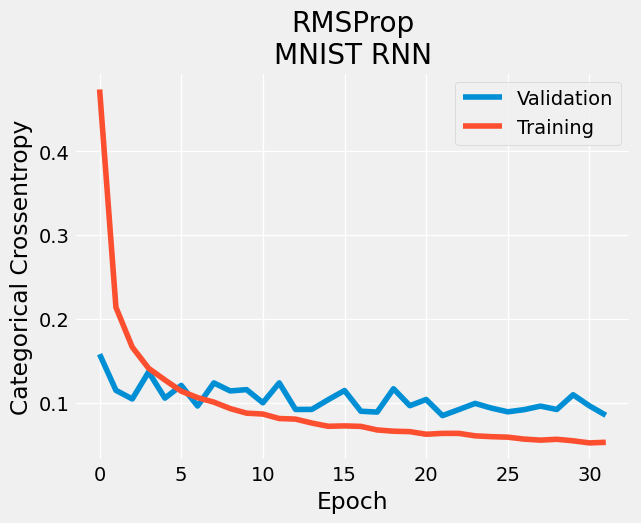

In [8]:
plt.plot(h0.history['val_loss'])
plt.plot(h0.history['loss'])
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Validation','Training'])
plt.title('RMSProp\nMNIST RNN')
plt.grid(color='white')
plt.show()

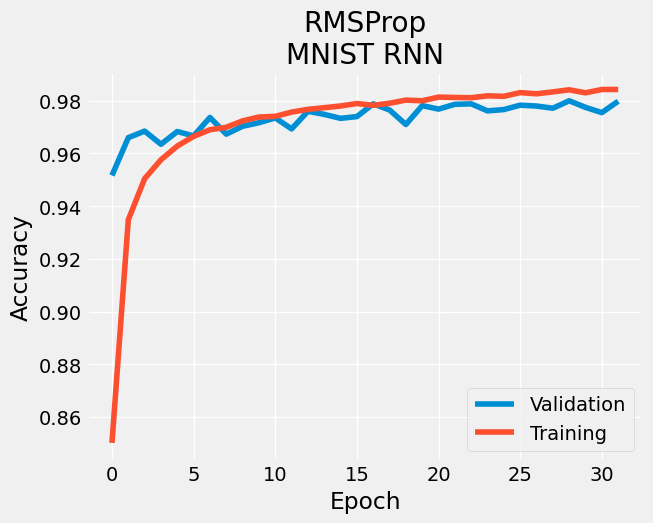

In [18]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h0.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation','Training'])
plt.title('RMSProp\nMNIST RNN')
plt.grid(color='white')
plt.show()

### Second Model, AdaGrad

In [10]:
%%time
h1=model_build('adagrad',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2494 - loss: 2.1236 - val_accuracy: 0.5990 - val_loss: 1.4409
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5800 - loss: 1.3717 - val_accuracy: 0.7312 - val_loss: 0.9895
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6867 - loss: 1.0191 - val_accuracy: 0.8015 - val_loss: 0.7439
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7558 - loss: 0.8087 - val_accuracy: 0.8498 - val_loss: 0.5861
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8035 - loss: 0.6669 - val_accuracy: 0.8767 - val_loss: 0.4793
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8337 - loss: 0.5686 - val_accuracy: 0.8958 - val_loss: 0.4066
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8574 - loss: 0.4985 - val_accuracy: 0.9048 - val_loss: 0.3562
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8714 - loss: 0.446

### Third Model, SGD + Nesterov Mommentum

In [11]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

In [12]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5306 - loss: 1.4312 - val_accuracy: 0.8933 - val_loss: 0.3826
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8733 - loss: 0.4343 - val_accuracy: 0.9287 - val_loss: 0.2374
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9209 - loss: 0.2760 - val_accuracy: 0.9425 - val_loss: 0.1879
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9367 - loss: 0.2274 - val_accuracy: 0.9532 - val_loss: 0.1577
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9466 - loss: 0.1899 - val_accuracy: 0.9625 - val_loss: 0.1290
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9520 - loss: 0.1648 - val_accuracy: 0.9693 - val_loss: 0.1140
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9576 - loss: 0.1463 - val_accuracy: 0.9683 - val_loss: 0.1090
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9602 - loss: 0.1356 - 

### 4th Model, Adam

In [13]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7299 - loss: 0.8263 - val_accuracy: 0.9440 - val_loss: 0.1839
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9323 - loss: 0.2280 - val_accuracy: 0.9578 - val_loss: 0.1485
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9496 - loss: 0.1683 - val_accuracy: 0.9628 - val_loss: 0.1226
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9549 - loss: 0.1511 - val_accuracy: 0.9712 - val_loss: 0.1094
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9625 - loss: 0.1280 - val_accuracy: 0.9677 - val_loss: 0.1134
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9658 - loss: 0.1170 - val_accuracy: 0.9677 - val_loss: 0.1123
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9636 - loss: 0.1211 - val_accuracy: 0.9763 - val_loss: 0.0882
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9714 - loss: 0.0989 - 

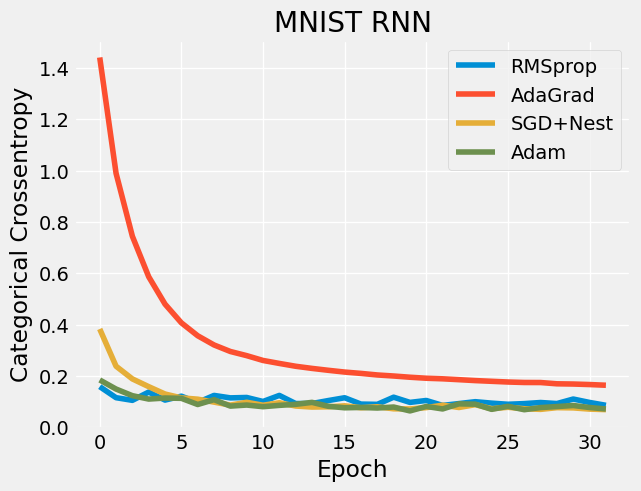

In [19]:
plt.plot(h0.history['val_loss'])
plt.plot(h1.history['val_loss'])
plt.plot(h2.history['val_loss'])
plt.plot(h3.history['val_loss'])
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.title('MNIST RNN')
plt.grid(color='white')
plt.show()

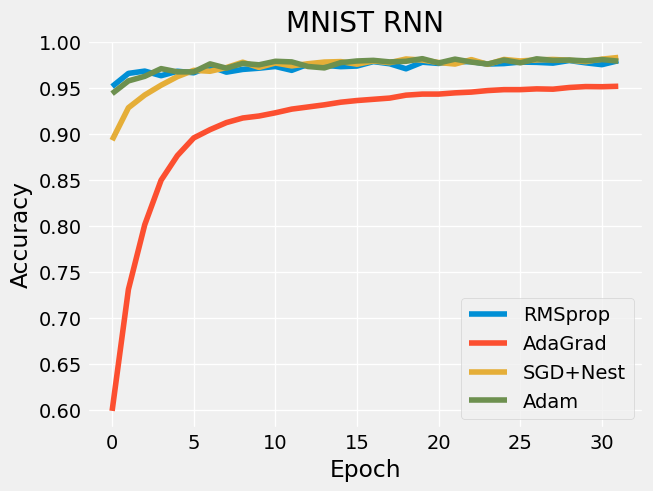

In [20]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.title('MNIST RNN')
plt.grid(color='white')
plt.show()

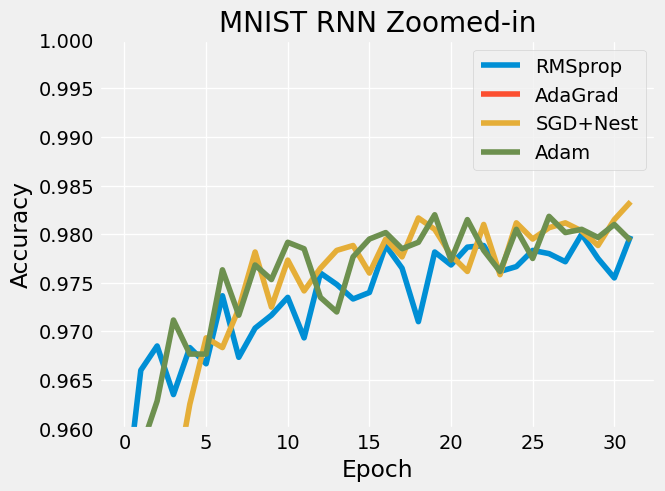

In [21]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.title('MNIST RNN Zoomed-in')
plt.grid(color='white')
plt.ylim([0.96,1.00])
plt.show()

In [17]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 128)                 │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,898 (148.04 KB)

 Trainable params: 37,898 (148.04 KB)

 Non-trainable params: 0 (0.00 B)